
### Data Information:


```
Scraped from publicly available results posted every week from Domain.com.au.

Some Key Details
Suburb: Suburb

Address: Address

Rooms: Number of rooms

Price: Price in Australian dollars

Method:
S - property sold;
SP - property sold prior;
PI - property passed in;
PN - sold prior not disclosed;
SN - sold not disclosed;
NB - no bid;
VB - vendor bid;
W - withdrawn prior to auction;
SA - sold after auction;
SS - sold after auction price not disclosed.
N/A - price or highest bid not available.

Type:
br - bedroom(s);
h - house,cottage,villa, semi,terrace;
u - unit, duplex;
t - townhouse;
dev site - development site;
o res - other residential.

SellerG: Real Estate Agent

Date: Date sold

Distance: Distance from CBD in Kilometres

Regionname: General Region (West, North West, North, North east …etc)

Propertycount: Number of properties that exist in the suburb.

Bedroom2 : Scraped # of Bedrooms (from different source)

Bathroom: Number of Bathrooms

Car: Number of carspots

Landsize: Land Size in Metres

BuildingArea: Building Size in Metres

YearBuilt: Year the house was built

CouncilArea: Governing council for the area

Lattitude: Self explanitory

Longtitude: Self explanitory
```


## Loading Data


In [1]:
import math
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

df = pd.read_csv('melb_data.csv')
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


## Exploratory Analysis 

In [2]:
suburbs = df['Suburb']
suburbs.nunique()

314

In [3]:
df['Address'].nunique()

13378

In [4]:
df_Kensington = df[df['Suburb'] == 'Kensington']
df_Kensington['Price'].mean()

831667.4358974359

In [5]:
df_YearBuilt = df[df['YearBuilt'].notnull()]
f'{round(len(df_YearBuilt) / len(df) * 100, 2)}% of properties contain a yearbuilt value'

'60.42% of properties contain a yearbuilt value'

## Ploting the Landsize

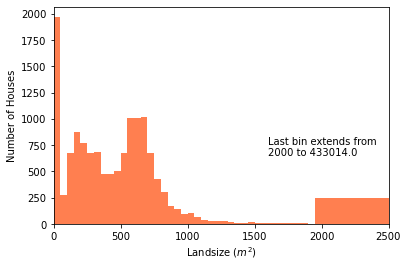

A plurality of houses have a landsize from 0 to 50 meters.
For those that don't, their land size is concentrated sround 250 and 600 meters.


In [6]:
bins = [x for x in range(0, 2_000, 50)] + [df['Landsize'].max()]
plt.hist(df['Landsize'], bins = bins, color = 'coral') 
plt.xlim(0, 2_500)
plt.xlabel('Landsize ($m^2$)')
plt.ylabel('Number of Houses')
plt.text(1_600, 650, f'Last bin extends from\n2000 to {df["Landsize"].max()}')
plt.show()
print('A plurality of houses have a landsize from 0 to 50 meters.\n\
For those that don\'t, their land size is concentrated sround 250 and 600 meters.')

## Ploting scatter plot of price as a function of BuildingArea

Text(1250, 5000000.0, 'Points not shown:\n(6791, 1280000),\n(3112, 2608000),\n(3558, 930000),\n(44515, 1355000)')

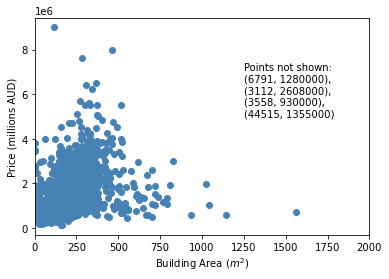

In [7]:
# Building area on x axis, price on y
df_noNull = df[df['BuildingArea'].notnull()]
df_BuildingArea = df_noNull['BuildingArea']

# getting excluded points
# df_temp = df_noNull[['BuildingArea', 'Price']]
# for i in range(1, len(df)): 
#     if df['BuildingArea'][i] > 2000:
#         print(df['BuildingArea'][i], df['Price'][i])
#    print(next)
df_Price = df_noNull['Price']
plt.scatter(df_BuildingArea, df_Price, color = 'steelblue')
plt.xlim(0, 2_000)
plt.ylabel('Price (millions AUD)')
plt.xlabel('Building Area ($m^2$)')
plt.text(1250, 5e6, 'Points not shown:\n(6791, 1280000),\n(3112, 2608000),\n(3558, 930000),\n(44515, 1355000)')

## Top 10 SellerGroups

In [8]:
# Drop duplicates
df_uniqueProps = df.drop_duplicates('Address')
# Get top 10
seller_series = df_uniqueProps['SellerG']
ten_largest = seller_series.value_counts().nlargest(n=10)
# Transform to percent
ten_largest = (ten_largest / len(df_uniqueProps)) * 100
ten_largest

Nelson           11.376887
Jellis            9.739871
hockingstuart     8.641052
Barry             7.504859
Ray               5.210046
Marshall          4.873673
Buxton            4.679324
Biggin            2.900284
Brad              2.541486
Fletchers         2.227538
Name: SellerG, dtype: float64

## Fix room number col

In [9]:
# for loop method 
# make deep copy
df1 = df.copy(deep=True)
for i in range(len(df1)):
    df1['Rooms'][i] += 1
    
# single statement 
# make deep copy 
df2 = df.copy(deep=True)
df2['Rooms'] = df2['Rooms'].apply(lambda x: x + 1)

print(df1.head())
print(df2.head())

<ipython-input-9-22b6d9fabf95>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Rooms'][i] += 1


       Suburb           Address  Rooms Type      Price Method SellerG  \
0  Abbotsford      85 Turner St      3    h  1480000.0      S  Biggin   
1  Abbotsford   25 Bloomburg St      3    h  1035000.0      S  Biggin   
2  Abbotsford      5 Charles St      4    h  1465000.0     SP  Biggin   
3  Abbotsford  40 Federation La      4    h   850000.0     PI  Biggin   
4  Abbotsford       55a Park St      5    h  1600000.0     VB  Nelson   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
1  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
2  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   
3  4/03/2017       2.5    3067.0  ...       2.0  1.0      94.0           NaN   
4  4/06/2016       2.5    3067.0  ...       1.0  2.0     120.0         142.0   

   YearBuilt  CouncilArea Lattitude  Longtitude             Regionname  \
0     

## Address of the earliest built house

In [10]:
# Get row index of min YearBuilt
i = df['YearBuilt'].idxmin()
# Get address
df['Address'][i]

'5 Armstrong St'

## Saving as csv file 

In [11]:
df_only_melborne = df[df['CouncilArea'] == 'Melbourne']
df_to_export = df_only_melborne[['Suburb', 'Price', 'Date']]
csv_file = df_to_export.to_csv(index = False)
csv_file

'Suburb,Price,Date\nFlemington,957000.0,22/05/2016\nKensington,785000.0,3/09/2016\nKensington,852000.0,3/09/2016\nKensington,1037000.0,3/09/2016\nKensington,775000.0,3/12/2016\nKensington,1470000.0,4/03/2017\nKensington,630000.0,4/03/2017\nKensington,492500.0,4/06/2016\nKensington,420000.0,4/06/2016\nKensington,650000.0,4/06/2016\nKensington,1050000.0,4/06/2016\nKensington,1291000.0,6/08/2016\nKensington,420000.0,6/08/2016\nKensington,961000.0,7/05/2016\nKensington,1271000.0,7/05/2016\nKensington,1010000.0,7/05/2016\nKensington,750000.0,7/05/2016\nKensington,1675000.0,7/05/2016\nKensington,905000.0,8/10/2016\nKensington,960000.0,8/10/2016\nKensington,1031000.0,8/10/2016\nKensington,918000.0,8/10/2016\nKensington,870000.0,8/10/2016\nKensington,1165000.0,10/09/2016\nKensington,1710000.0,10/09/2016\nKensington,360000.0,10/12/2016\nKensington,1455000.0,10/12/2016\nKensington,365000.0,10/12/2016\nKensington,551000.0,10/12/2016\nKensington,442000.0,10/12/2016\nKensington,765000.0,10/12/2016\